# Miniproject 5 : PCA, Support Vector Machines and CNN

Total Points: 15     

Task 1 and Tas 2 : 5 Points      
Task 3:            10 points (Alternative to your take home exam.)


## Notes on Miniproject 5
For Task 1, the biplot code was taken from this [article](https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e).

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

### Task 1: 
Recreate Fig 12.4 from the book for USArrest Data.         

Comment (4 peices of information) on two different plots PCA visualization using two principal components with and without scaling the data.         

(Note: You can refer to the github repo I introduced at the beginning of the course.)


In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Get USArrest dataset
df = pd.read_csv('pca_resources/USArrests.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
# Display several entries
df.head(10)

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0      Alabama    13.2      236        58  21.2
1       Alaska    10.0      263        48  44.5
2      Arizona     8.1      294        80  31.0
3     Arkansas     8.8      190        50  19.5
4   California     9.0      276        91  40.6
5     Colorado     7.9      204        78  38.7
6  Connecticut     3.3      110        77  11.1
7     Delaware     5.9      238        72  15.8
8      Florida    15.4      335        80  31.9
9      Georgia    17.4      211        60  25.8

In [5]:
names = ['Murder', 'Assault', 'UrbanPop', 'Rape']

In [6]:
# Get scaled and unscaled input data
x = df[names].values
x_std = StandardScaler().fit_transform(x)
n = x.shape[1]

In [7]:
# PCA on scaled data
pca_std = PCA(n_components=n)
pca_std.fit(x_std)
project_std = pca_std.transform(x_std)

In [8]:
# PCA on unscaled data
pca = PCA(n_components=n)
pca.fit(x)
project = pca.transform(x)

In [9]:
from matplotlib.colors import ListedColormap

def biplot(
    projected_data=None, 
    coeff=None, 
    pc_names=None, 
    labels=None,
    mult=1.0
):
    '''
    Original implementation by: 
      Serafeim Loukas, serafeim.loukas@epfl.ch
    
    Inputs:
       projected_data: the projected data
       coeff:          the eigenvectors (PCs)
       pc_names:       names of principal components
       labels:         labels for data samples
       mult:           multiplier for line lengths
    '''
    xs = projected_data[:,0] # projection on PC1
    ys = projected_data[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    
    plt.figure(figsize=(8,6), dpi=100)
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(xs, ys, c=labels, cmap=cm_bright, marker='.')
    
    for i in range(n):
        # Create arrows to indicate direction of variance
        #  for each feature given first two PCs
        len_x = coeff[i,0] * mult
        len_y = coeff[i,1] * mult
        
        plt.arrow(
            x=0, 
            y=0, 
            dx=len_x, 
            dy=len_y, 
            color='y', 
            head_width=0.1,
            head_length=0.05,
            linewidth=0.5,
            length_includes_head=True
        )
        plt.text(
            len_x * 1.15, 
            len_y * 1.15, 
            pc_names[i], 
            color = 'k', 
            ha = 'center', 
            va = 'center', 
            fontsize=10
        )

    plt.xlabel("First Principal Component", size=12)
    plt.ylabel("Second Principal Component", size=12)
    
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    
    abs_min = min(-limx, -limy)
    abs_max = max(limx, limy)
    
    plt.xlim([abs_min, abs_max])
    plt.ylim([abs_min, abs_max])
    #plt.xlim([xs.min(), xs.max()])
    #plt.ylim([ys.min(), ys.max()])
    
    plt.tick_params(axis='both', which='both', labelsize=12)

### Scaled Data Biplot

In [25]:
pca_std.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

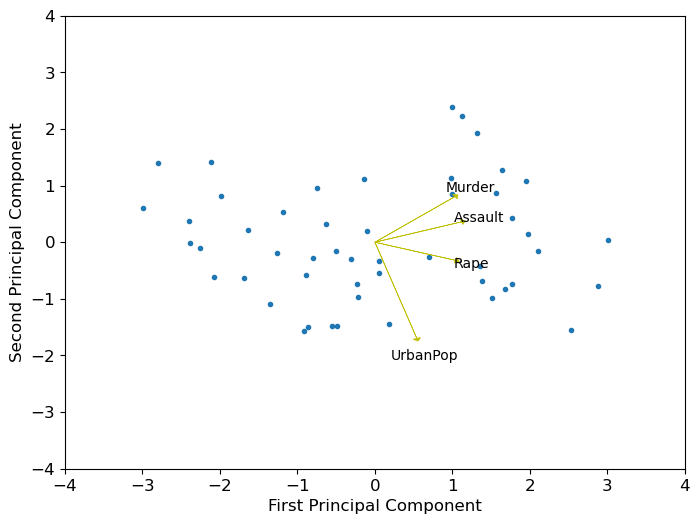

In [31]:
# Scaled data
biplot(
    projected_data=project_std, 
    coeff=np.transpose(pca_std.components_), 
    pc_names=names, 
    mult=2.0
)

### Unscaled Data Biplot

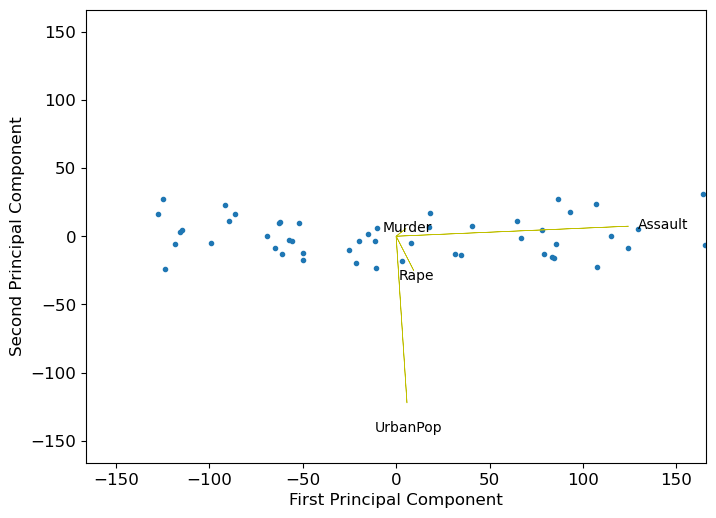

In [32]:
# Unscaled data
biplot(
    projected_data=project, 
    coeff=np.transpose(pca.components_), 
    pc_names=names, 
    mult=125.0
)

### Task 2: 
Separating concentric circles using PCA and KPCA    

1. Create a 1000 data points of two concentric circles, and plot data points from two circles in  color red and blue.      

You can use the make_circles function from sklearn.dataset to do this.       
make_circles(n_samples, random_state, noise, factor)      
use:   n_samples = 1000, random_state = 123, noise = 0.1, factor = 0.2     

2. Do PCA on the data and visualize PC decomposition using 2 PCs. 

3. Implement Kernel PCA using RBF kernel.      
You can use KernelPCA from sklearn.decomposition

3. Do KPCA visualization using two Kernel PCs and compare with Linear PCA visualization. You might want to try with different gamma for RBF. For example, case1: Gamma = 5, case2: Gamma = 15.      

4. Repeat 1-3 for half moon data. 

In [12]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA

### Circle Data

In [13]:
# 1) Make 1000 data points of two concentric circles
circles = make_circles(
    n_samples=1000,
    random_state=123,
    noise=0.1, 
    factor=0.2
)

In [14]:
# 2) Use PCA to visualize first two PCs
circles_pca = PCA(n_components=2)
circles_pca.fit(circles[0])
circle_project = circles_pca.transform(circles[0])

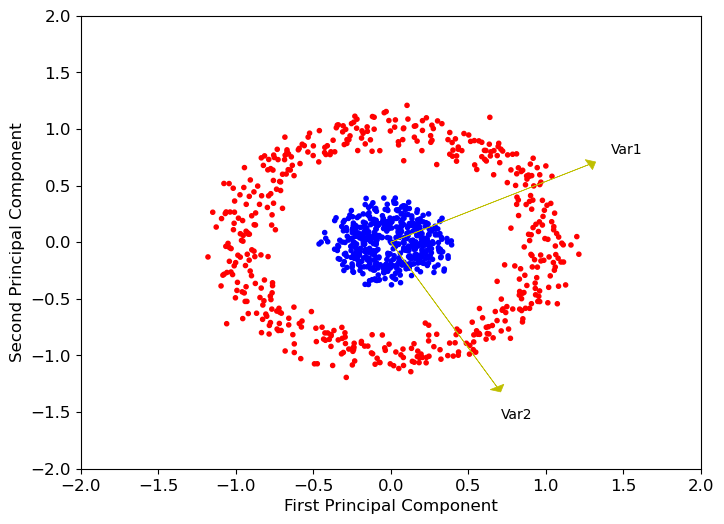

In [15]:
biplot(
    projected_data=circle_project, 
    coeff=np.transpose(circles_pca.components_), 
    pc_names=['Var1', 'Var2'], 
    labels=circles[1],
    mult=1.5
)

In [16]:
# 3) Apply kPCA using RBF kernel to circle data
circle_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=2)
circle_kpca.fit(circles[0])
circle_rbf_project = circle_kpca.transform(circles[0])

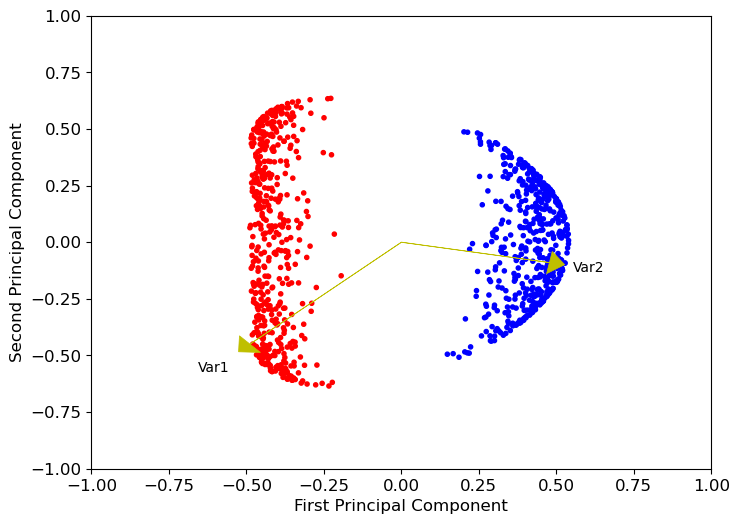

In [17]:
# 4) Visualize kernel PCA
biplot(
    projected_data=circle_rbf_project, 
    coeff=np.transpose(circle_kpca.eigenvectors_), 
    pc_names=['Var1', 'Var2'], 
    labels=circles[1],
    mult=15.0
)

The regular PCA approach's principal components will always be along their respective axes (for the variances of the x- and y-directions). 

For different values of `gamma`, kernel PCA (with RBF kernel) can change the shape of the data and therefore the variance, thus the directions of the variance for both principal components will be same. 

### Moon Data

In [18]:
# 1) Make 1000 data points of two moons
moons = make_moons(
    n_samples=1000,
    random_state=123,
    noise=0.1
)

In [19]:
# 2) Use PCA to visualize first two PCs
pca_moons = PCA(n_components=2)
pca_moons.fit(moons[0])
moons_project = pca_moons.transform(moons[0])

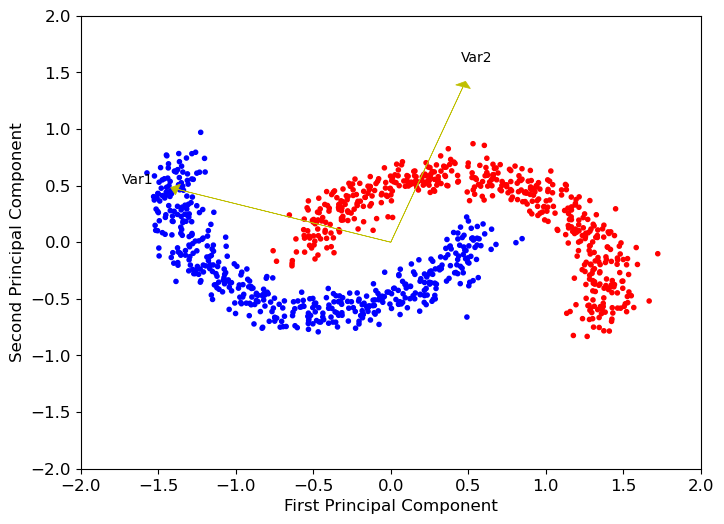

In [20]:
biplot(
    projected_data=moons_project, 
    coeff=np.transpose(pca_moons.components_), 
    pc_names=['Var1', 'Var2'], 
    labels=moons[1],
    mult=1.5
)

In [21]:
# 3) Apply kPCA using RBF kernel to moon data
kpca_moons = KernelPCA(n_components=2, kernel='rbf', gamma=15.0)
kpca_moons.fit(moons[0])
moons_rbf_project = kpca_moons.transform(moons[0])

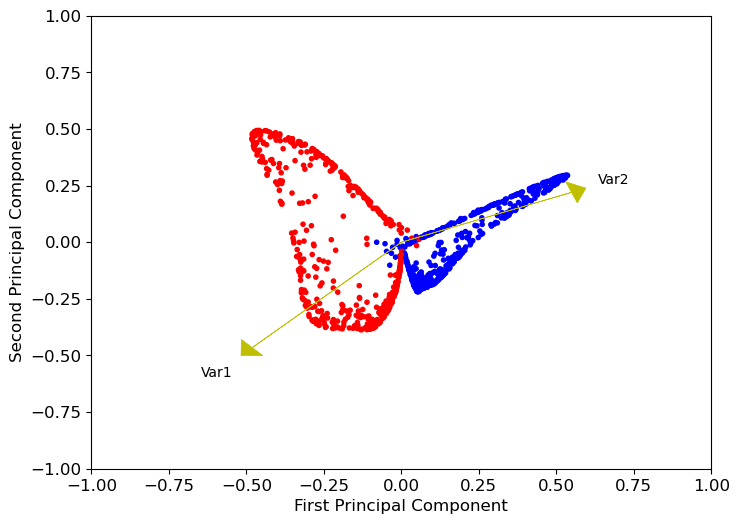

In [22]:
# 4) Visualize kPCA on moons data
biplot(
    projected_data=moons_rbf_project, 
    coeff=np.transpose(kpca_moons.eigenvectors_), 
    pc_names=['Var1', 'Var2'], 
    labels=moons[1],
    mult=10.0
)

### Task 3: 
MNIST data classification using neural nets and CNN in pytorch.    
1. Perform  classification on MNIST data using fully connected neural nets.      
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627      

2. Perform  classification on MNIST data using convolutional neural nets.  
https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118

Note: The links provided here are jsut some examples, there are millions tutorials available, feel free to use any as your reference. 